# External modules

In [1]:
library(tidyverse)
library(readr)
library(DescTools)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [4]:
n <- 10000

x <- rnorm(n)

# EDA

------------------------------------------------------------------------------ 
x (numeric)

           length                n                 NAs          unique'
           10'000           10'000                   0             = n
                            100.0%                0.0%                
                                                                      
              .05              .10                 .25          median
  -1.646297836389  -1.276185033927     -0.694029075801  0.004461151596
                                                                      
            range               sd               vcoef             mad
   8.688256109587   1.008852953954  1'037.692793879592  1.010378500988
                                                                      
              0s            mean           meanCI
               0  0.000972207728  -0.018803340623
            0.0%                   0.020747756080
                                              

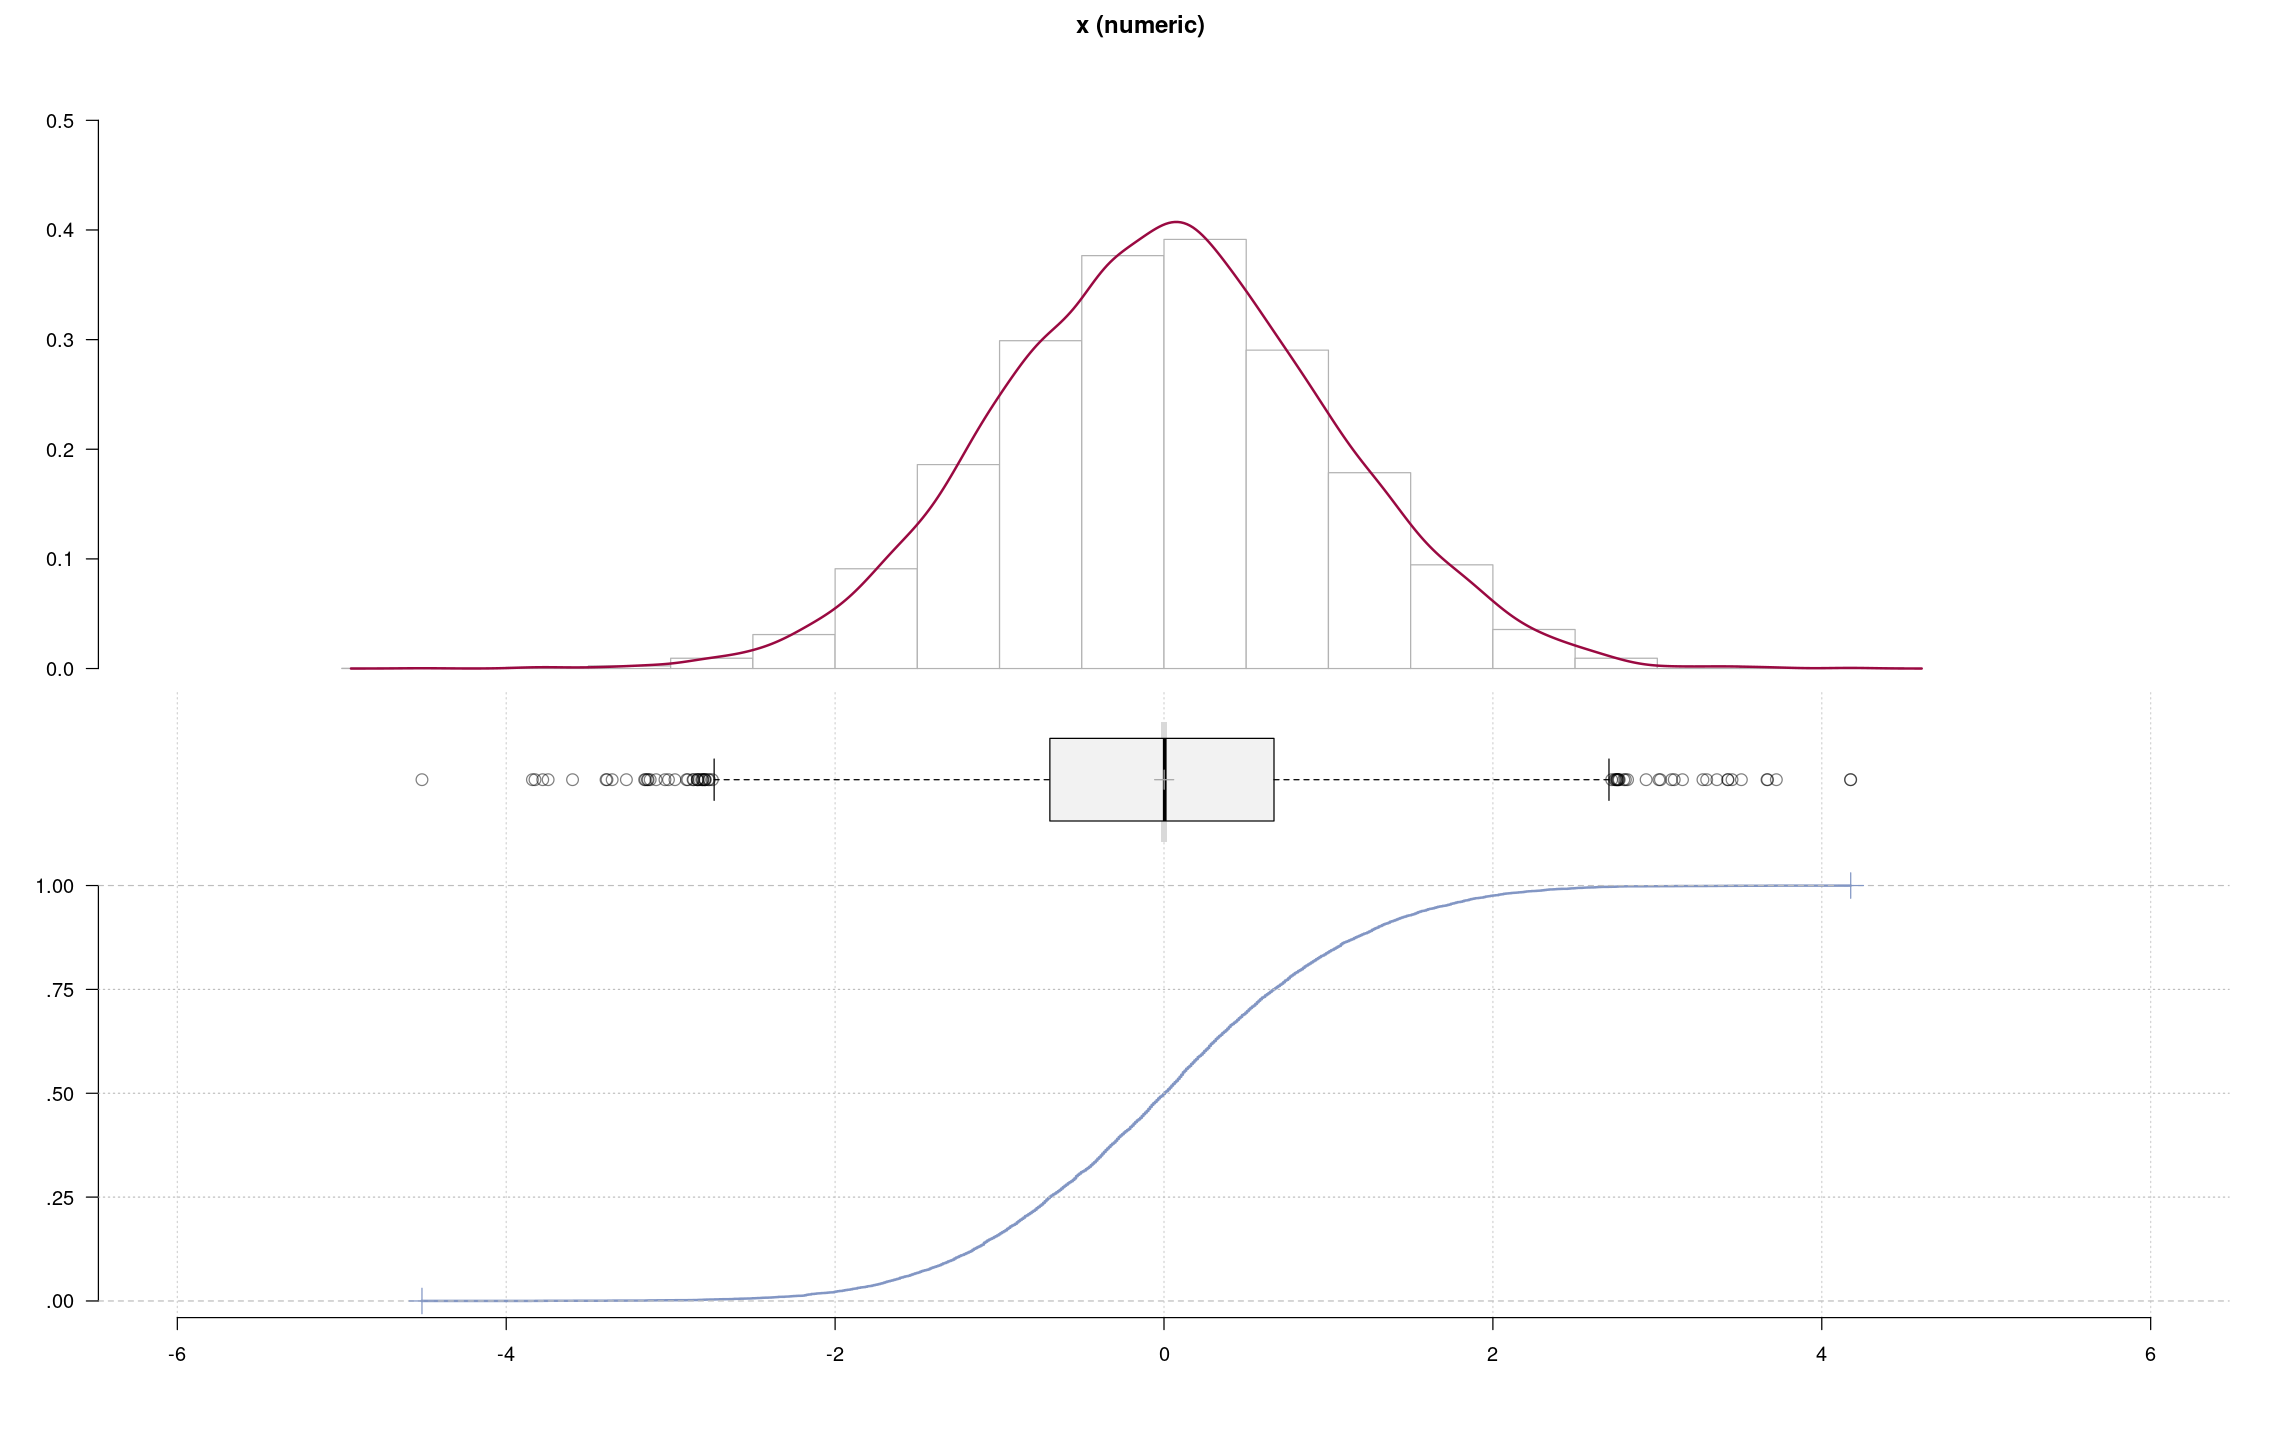

In [5]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

------------------------------------------------------------------------------ 
y (numeric)

        length             n           NAs        unique            0s'
         3'000         3'000             0           = n             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.5600967936  0.5996245562  0.7551586688  1.0470307369  1.4661027923
                                                                      
         range            sd         vcoef           mad           IQR
  3.6608220216  0.5298822620  0.4524269182  0.4900685865  0.7109441235
                                                                      
          mean        meanCI
  1.1711996806  1.1522307802
                1.1901685810
                            
           .90           .95
  1.9124555816  2.1938402086
                      

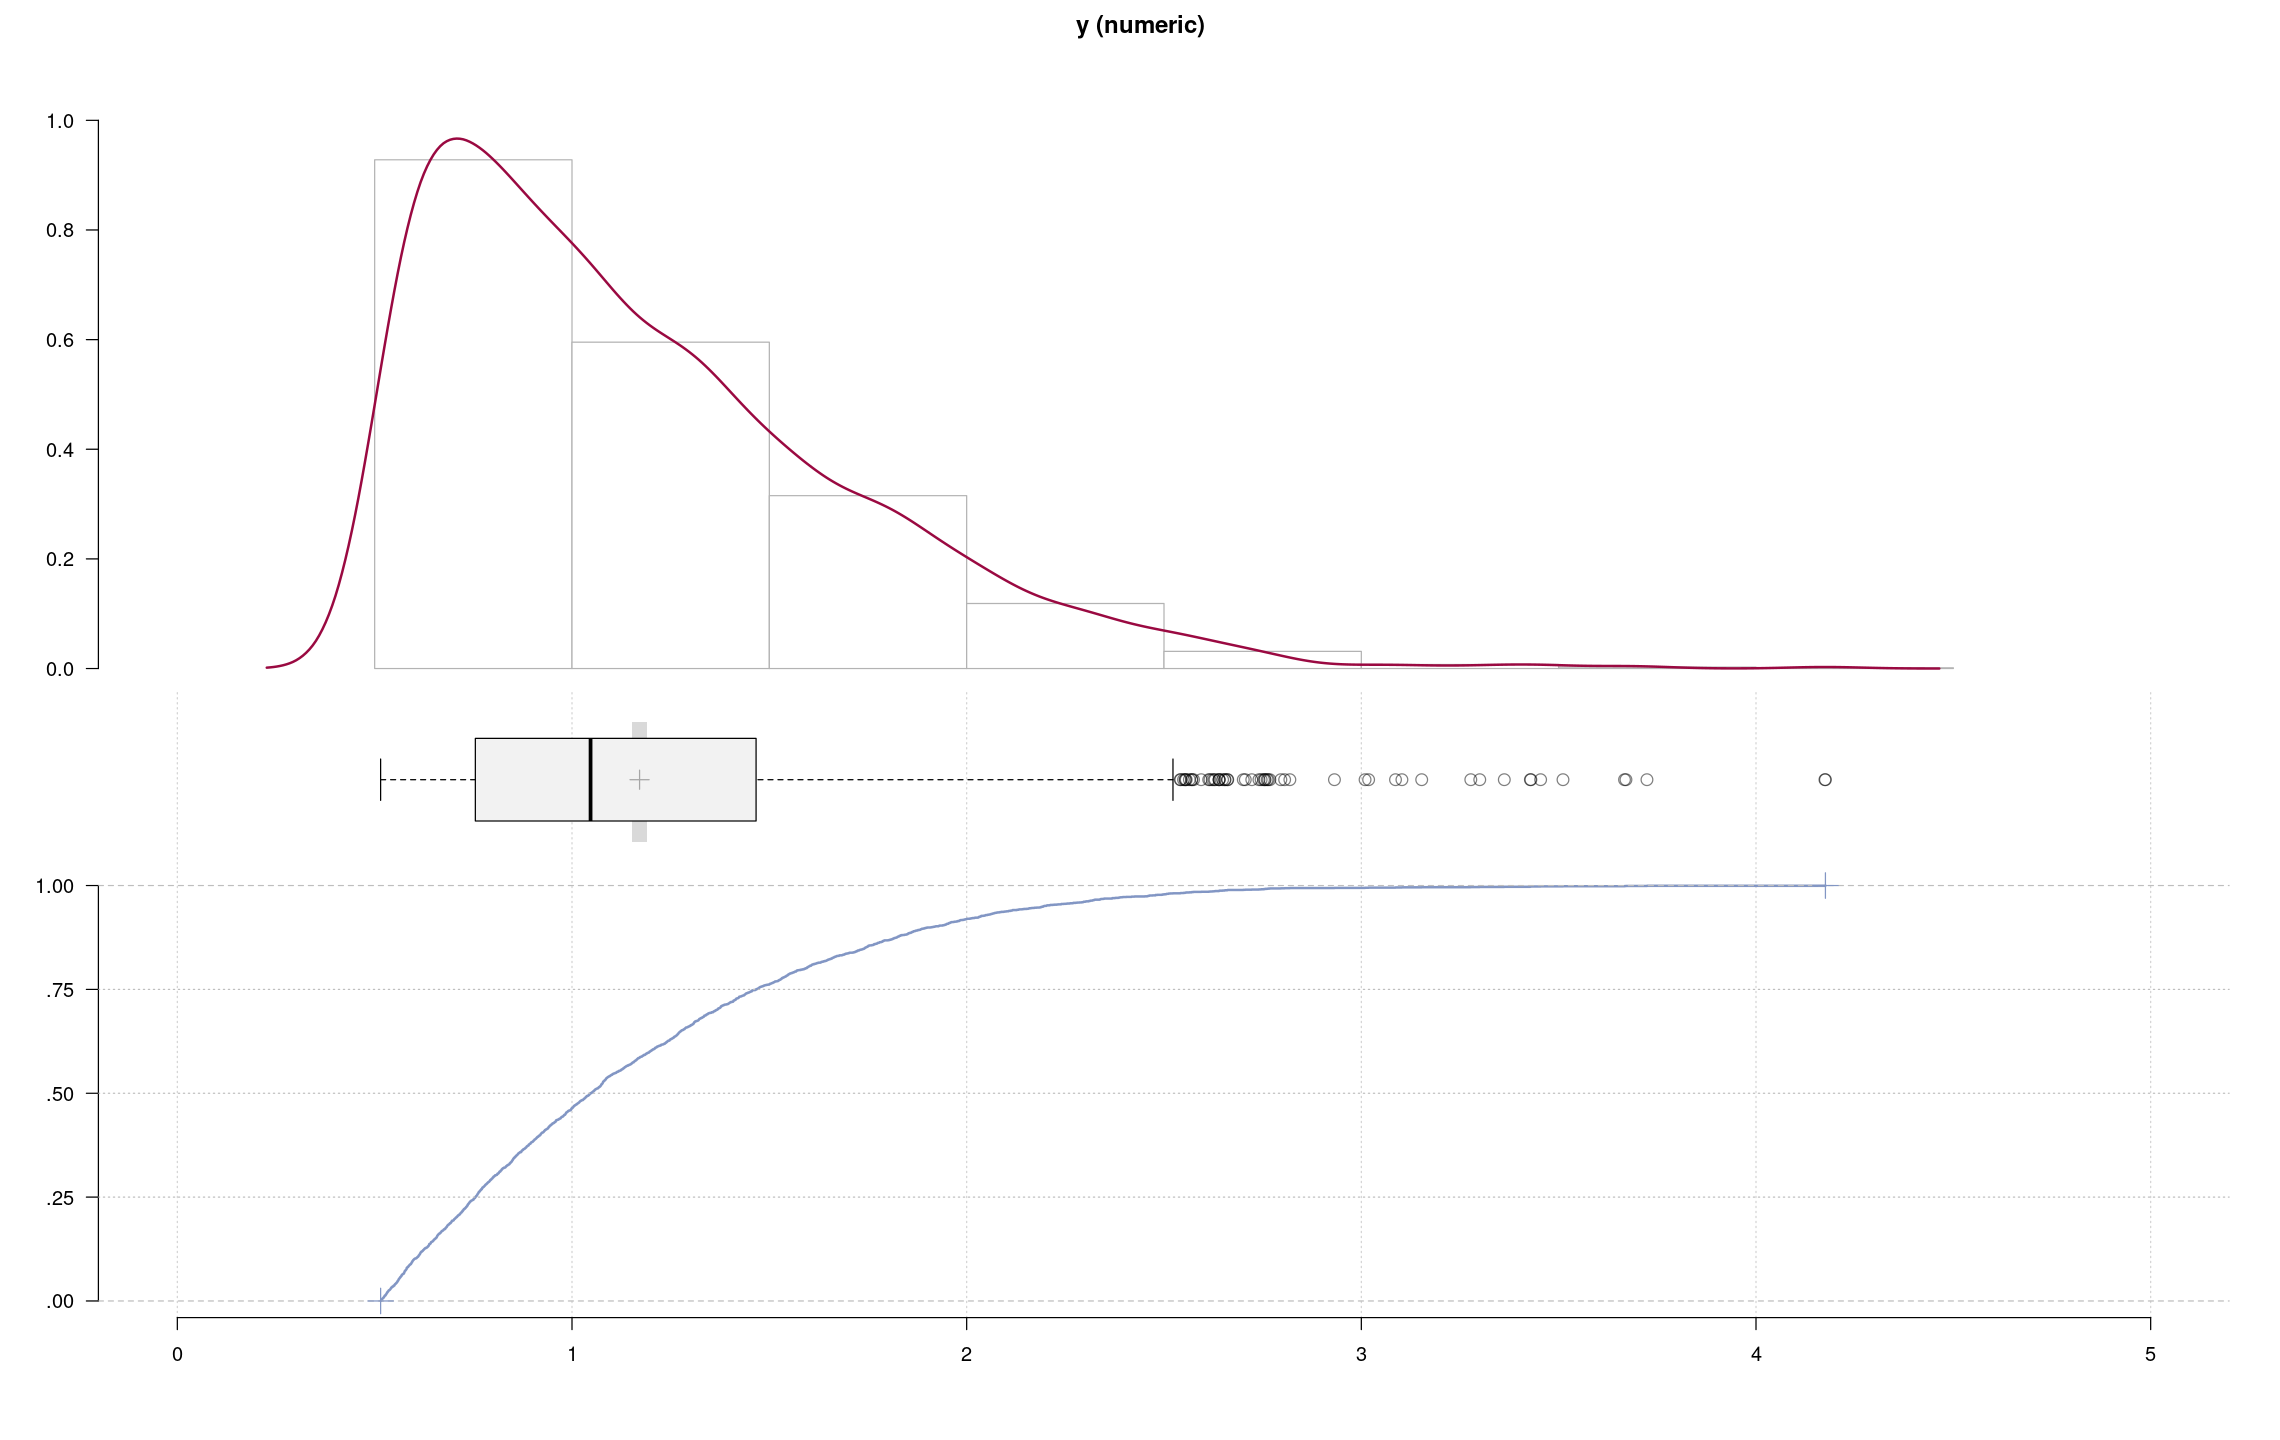

In [6]:
options(repr.plot.width=19, repr.plot.height=12)

nlargest <- 3000
y <- extract_nlargest_sample(x, n = nlargest)
Desc(y)

# Estimation

In [7]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = 3000,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])


In [8]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "equivalent_block_sizes"               
 [3] "unequivalent_block_sizes"             
 [4] "selected_block_sizes"                 
 [5] "unselected_block_sizes"               
 [6] "use_uniform_prior"                    
 [7] "weights"                              
 [8] "frequencies"                          
 [9] "use_extremal_index"                   
[10] "extremal_indexes"                     
[11] "negative_log_likelihoods"             
[12] "information_criteria"                 
[13] "unnormalized_gev_parameters_object"   
[14] "normalized_gev_parameters_object"     
[15] "full_normalized_gev_parameters_object"
[16] "partial_data"                         
[17] "all_data"                             
[18] "selected_model_per_obs"               
[19] "selected_gev_models"                  
[20] "several_residuals"                    
[21] "several_residuals_fit"                
[22] "several_residuals_diagnosics"         


In [9]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

       loc_star   scale_star       shape_star
2  0.9081352770 0.4378169750 -0.0130281060918
4  0.9001726509 0.4772884903 -0.0615278003390
5  0.9223950431 0.4651072945 -0.0561098891265
30 1.0327315655 0.3642659437  0.0164910115010
38 1.2425562516 0.2760973687  0.0767570968744
40 1.1353680131 0.3133010724  0.0514767666525
43 1.2701072883 0.2647562624  0.0810648987426
45 0.9203768492 0.4036135550 -0.0008298885502
47 1.1775410003 0.3002784781  0.0592374008668
50 1.3103907146 0.2586780036  0.0814459099660
53 1.1898485257 0.2949489254  0.0621242522271
54 0.7915370354 0.4469005740 -0.0129313647999
56 1.2210571659 0.3046011000  0.0477169309020
60 1.0564175154 0.3535652387  0.0216067391533


In [10]:
print(gev_mixture_model_object$weights)

              2               4               5              30              38 
0.0060544904137 0.0208543558695 0.0006727211571 0.0403632694248 0.0235452404978 
             40              43              45              47              50 
0.0746720484359 0.0437268752102 0.1173898419105 0.0097544567777 0.3400605449041 
             53              54              56              60 
0.0329633366969 0.2351160443996 0.0144635048772 0.0403632694248 


In [11]:
print(which.max(gev_mixture_model_object$weights))

50 
10 


In [12]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 10


In [13]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 2


In [14]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
5147.848784 5478.199000 


# Diagnostic

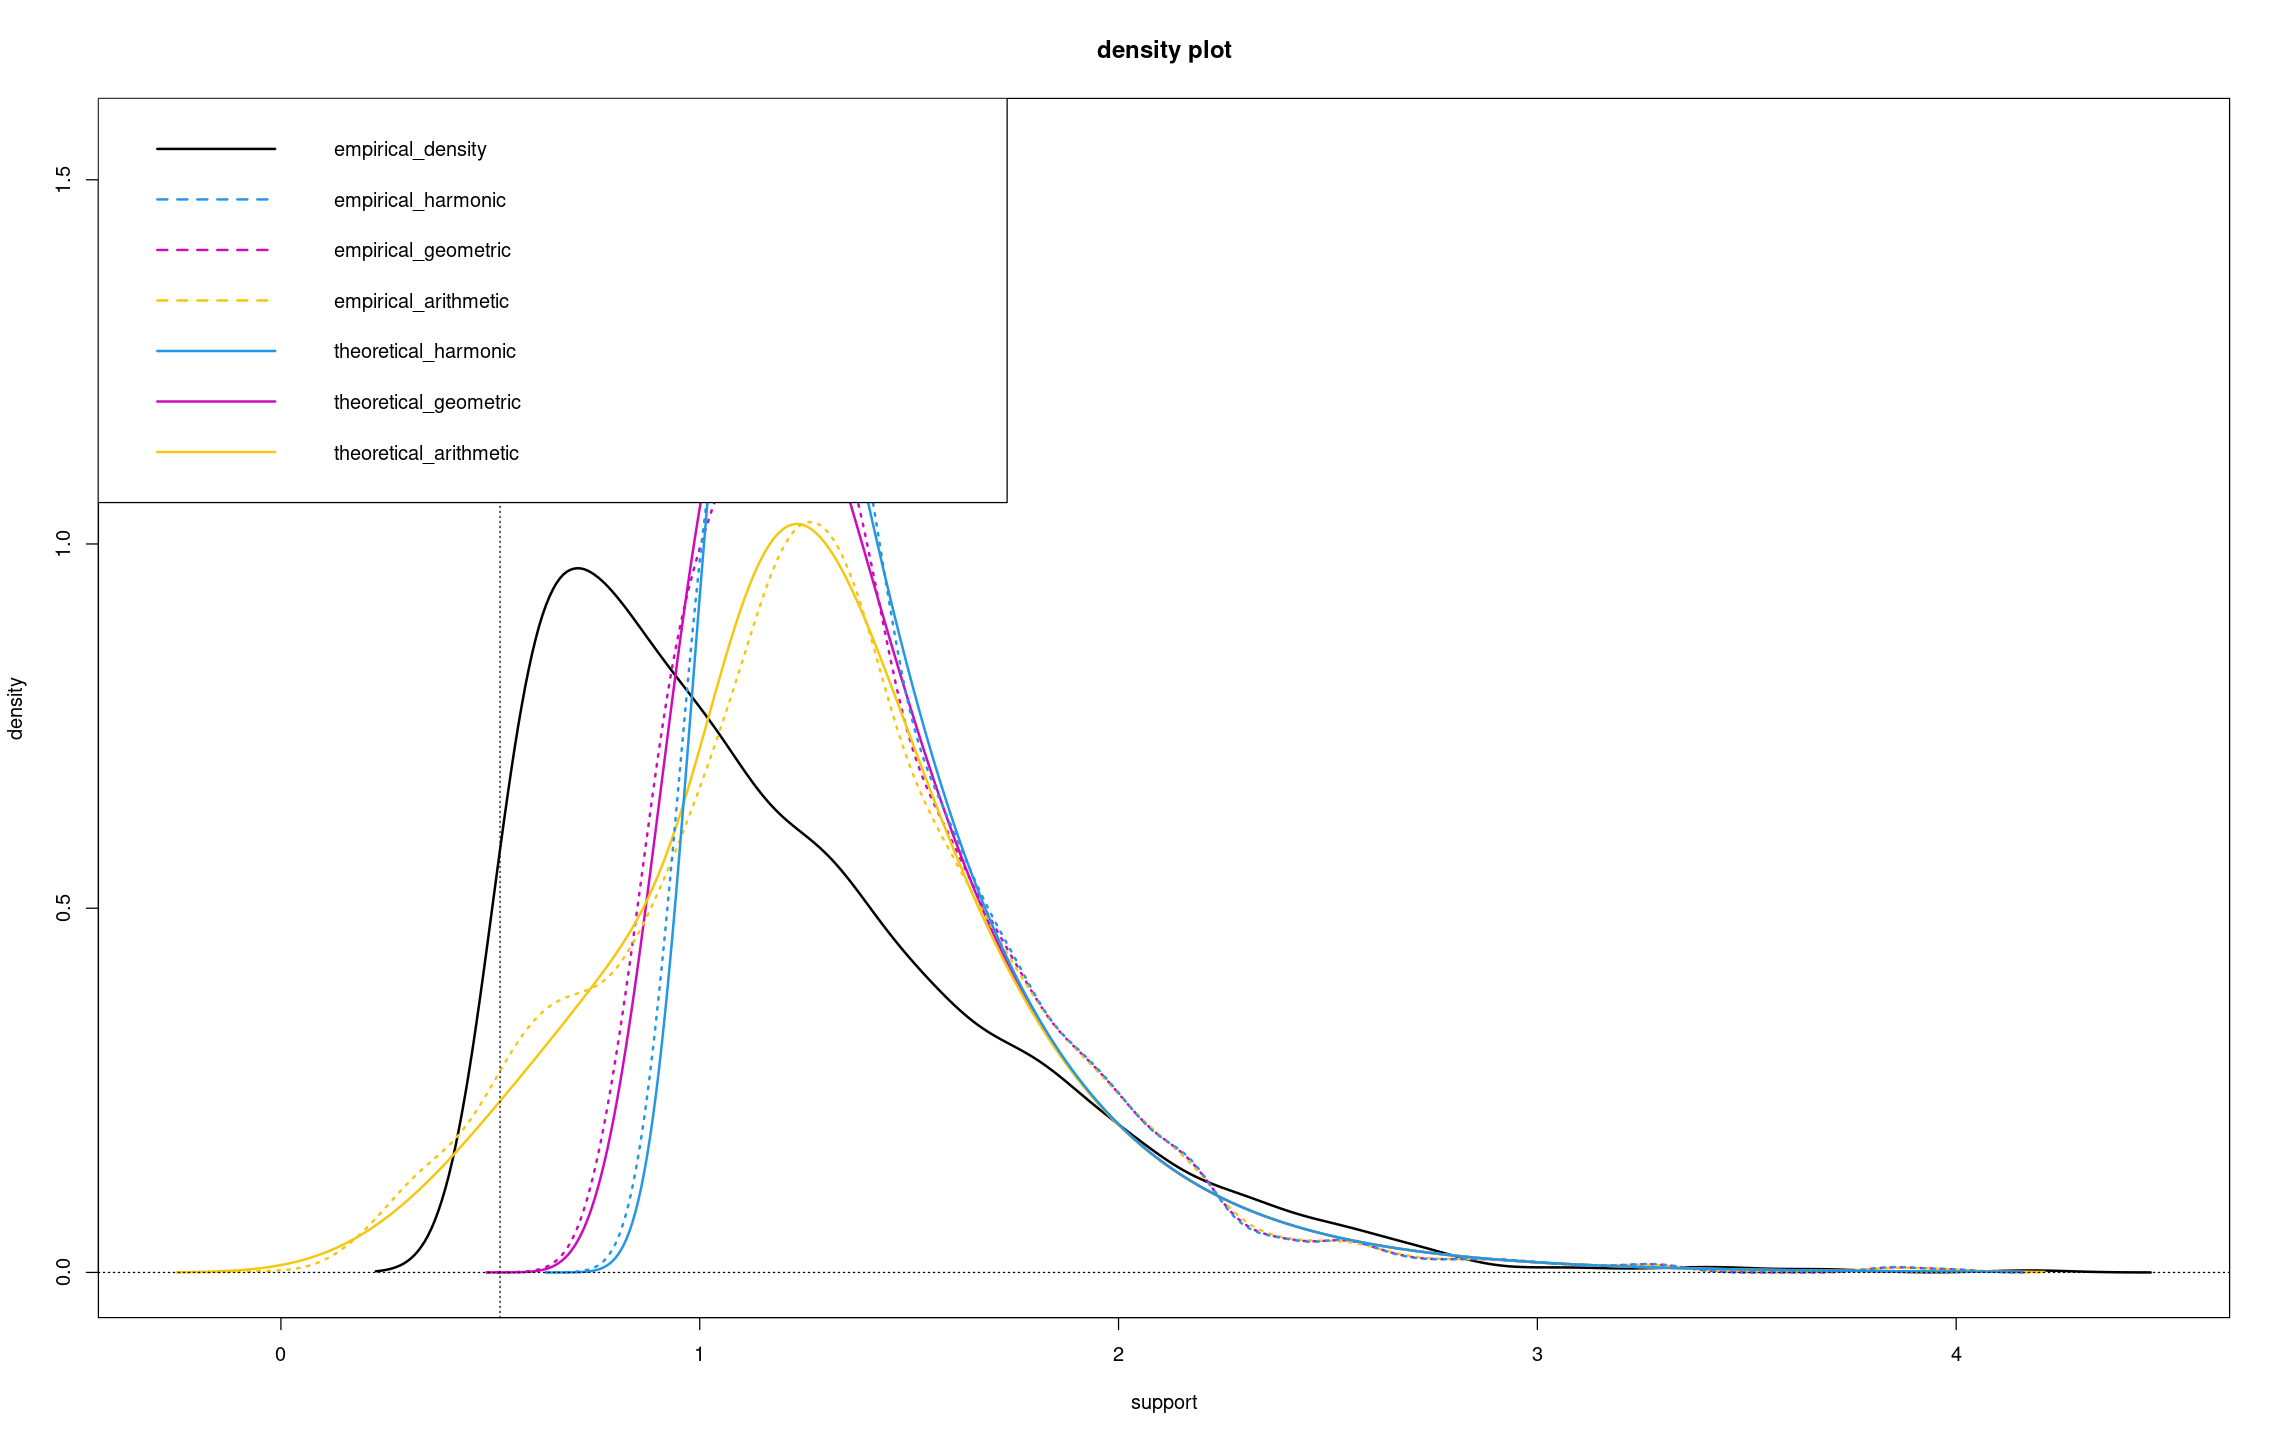

In [15]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

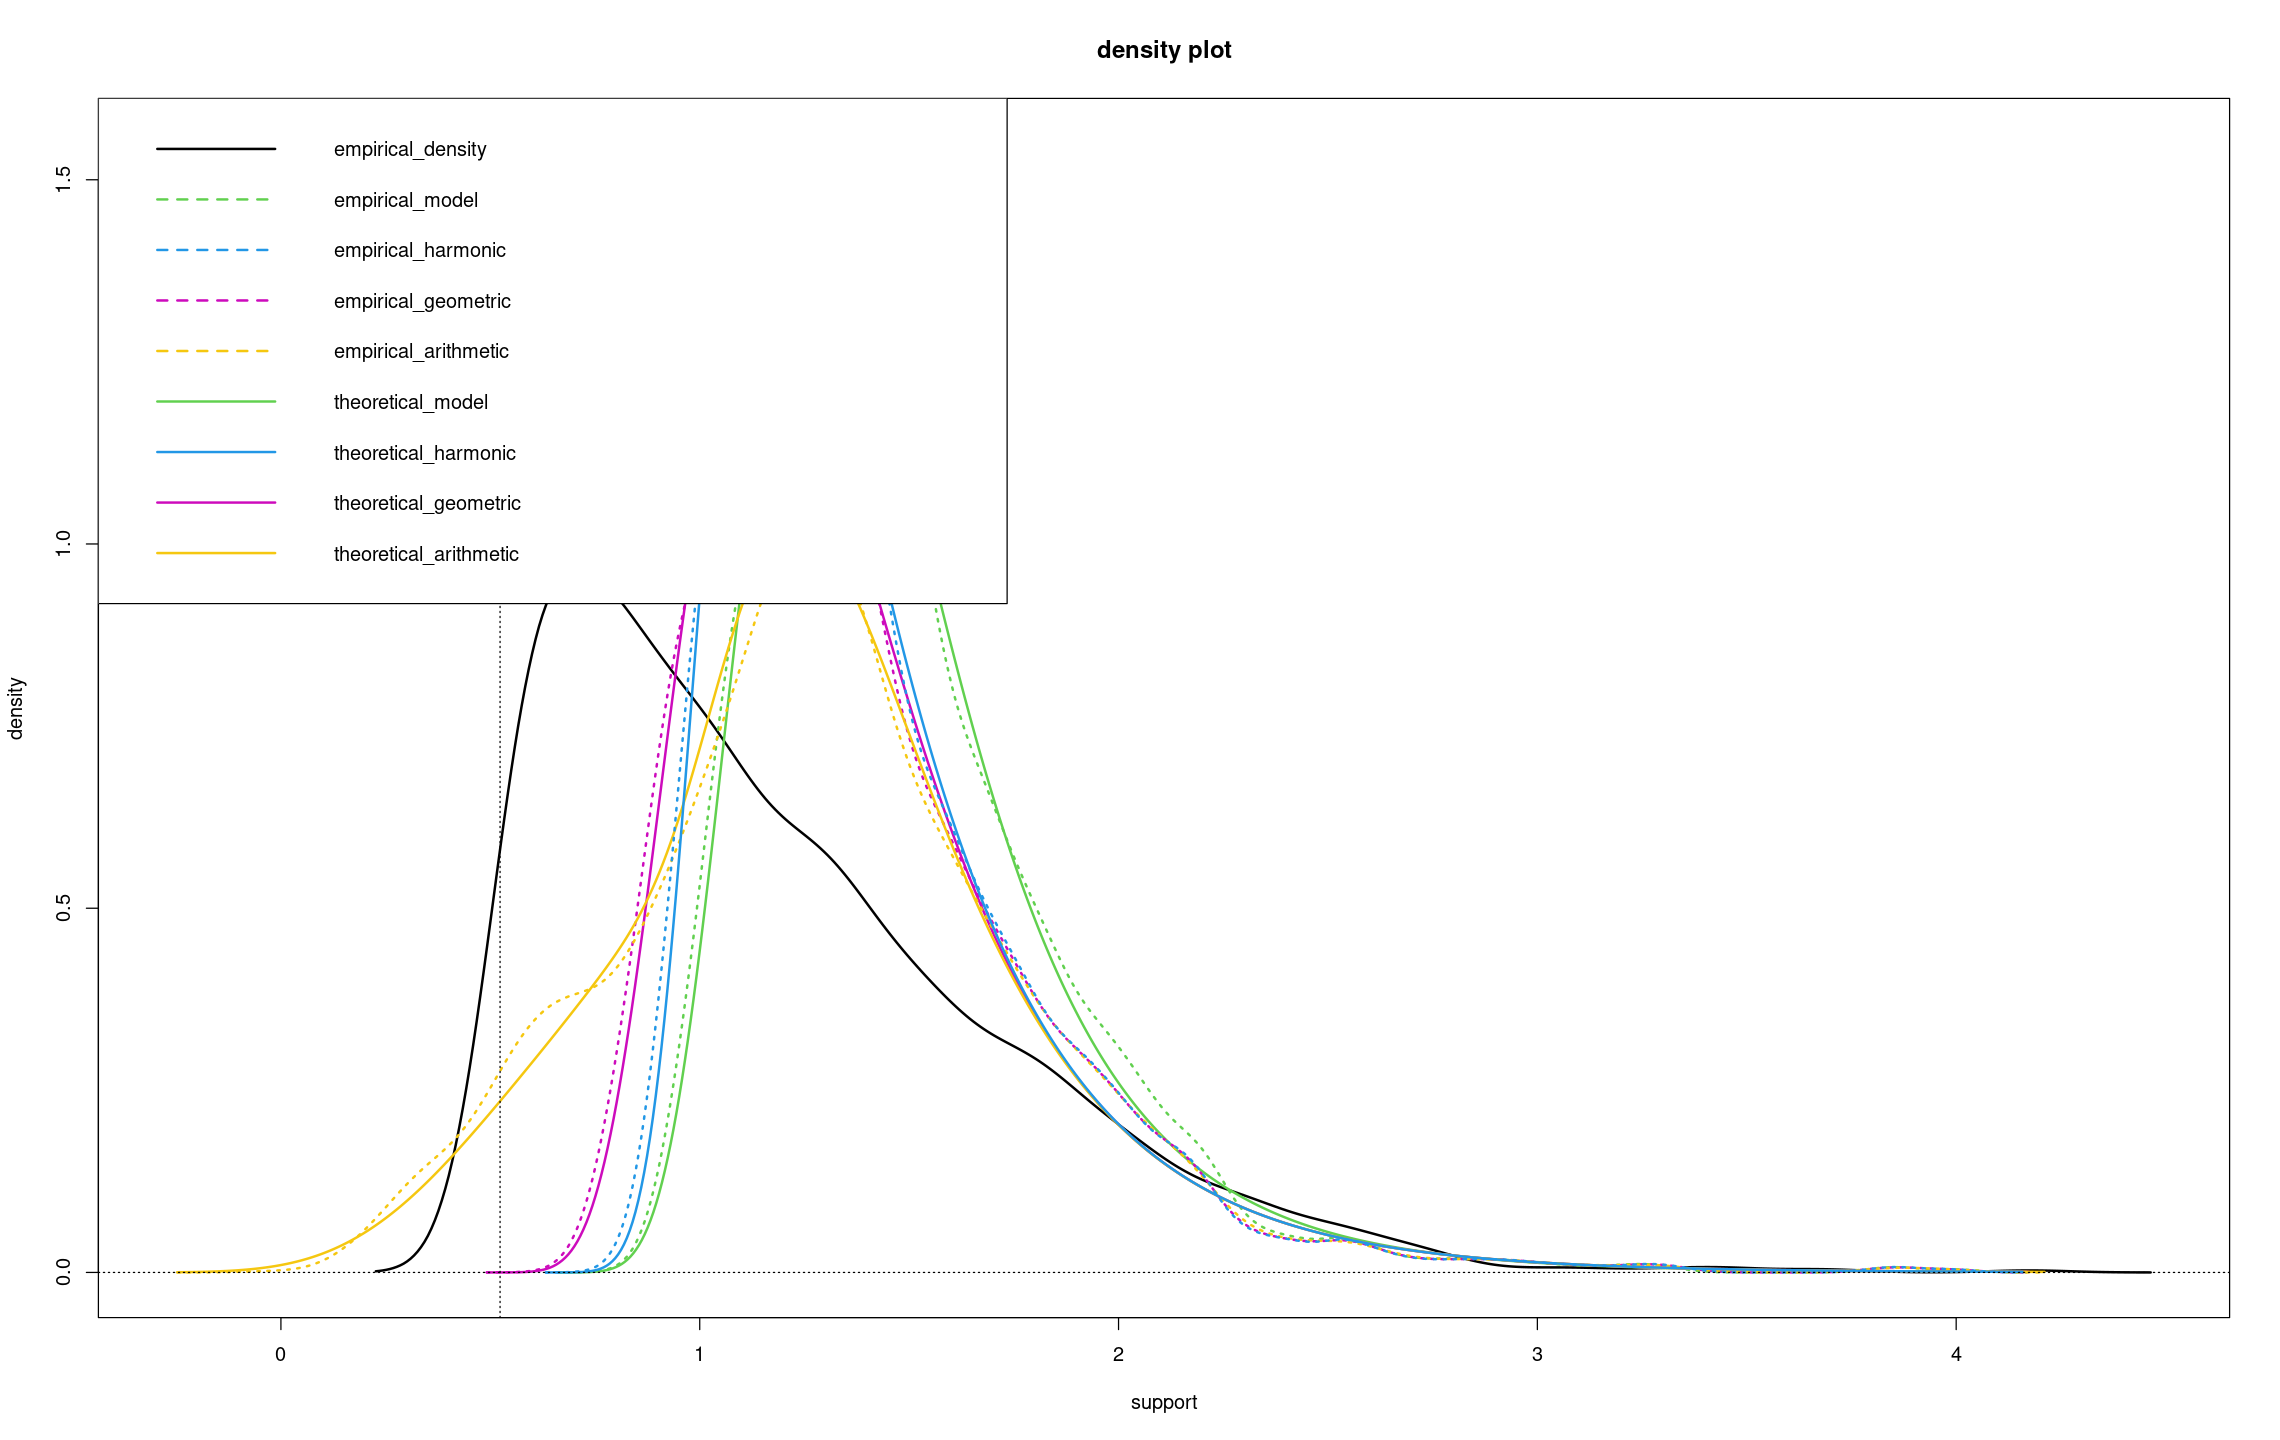

In [16]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

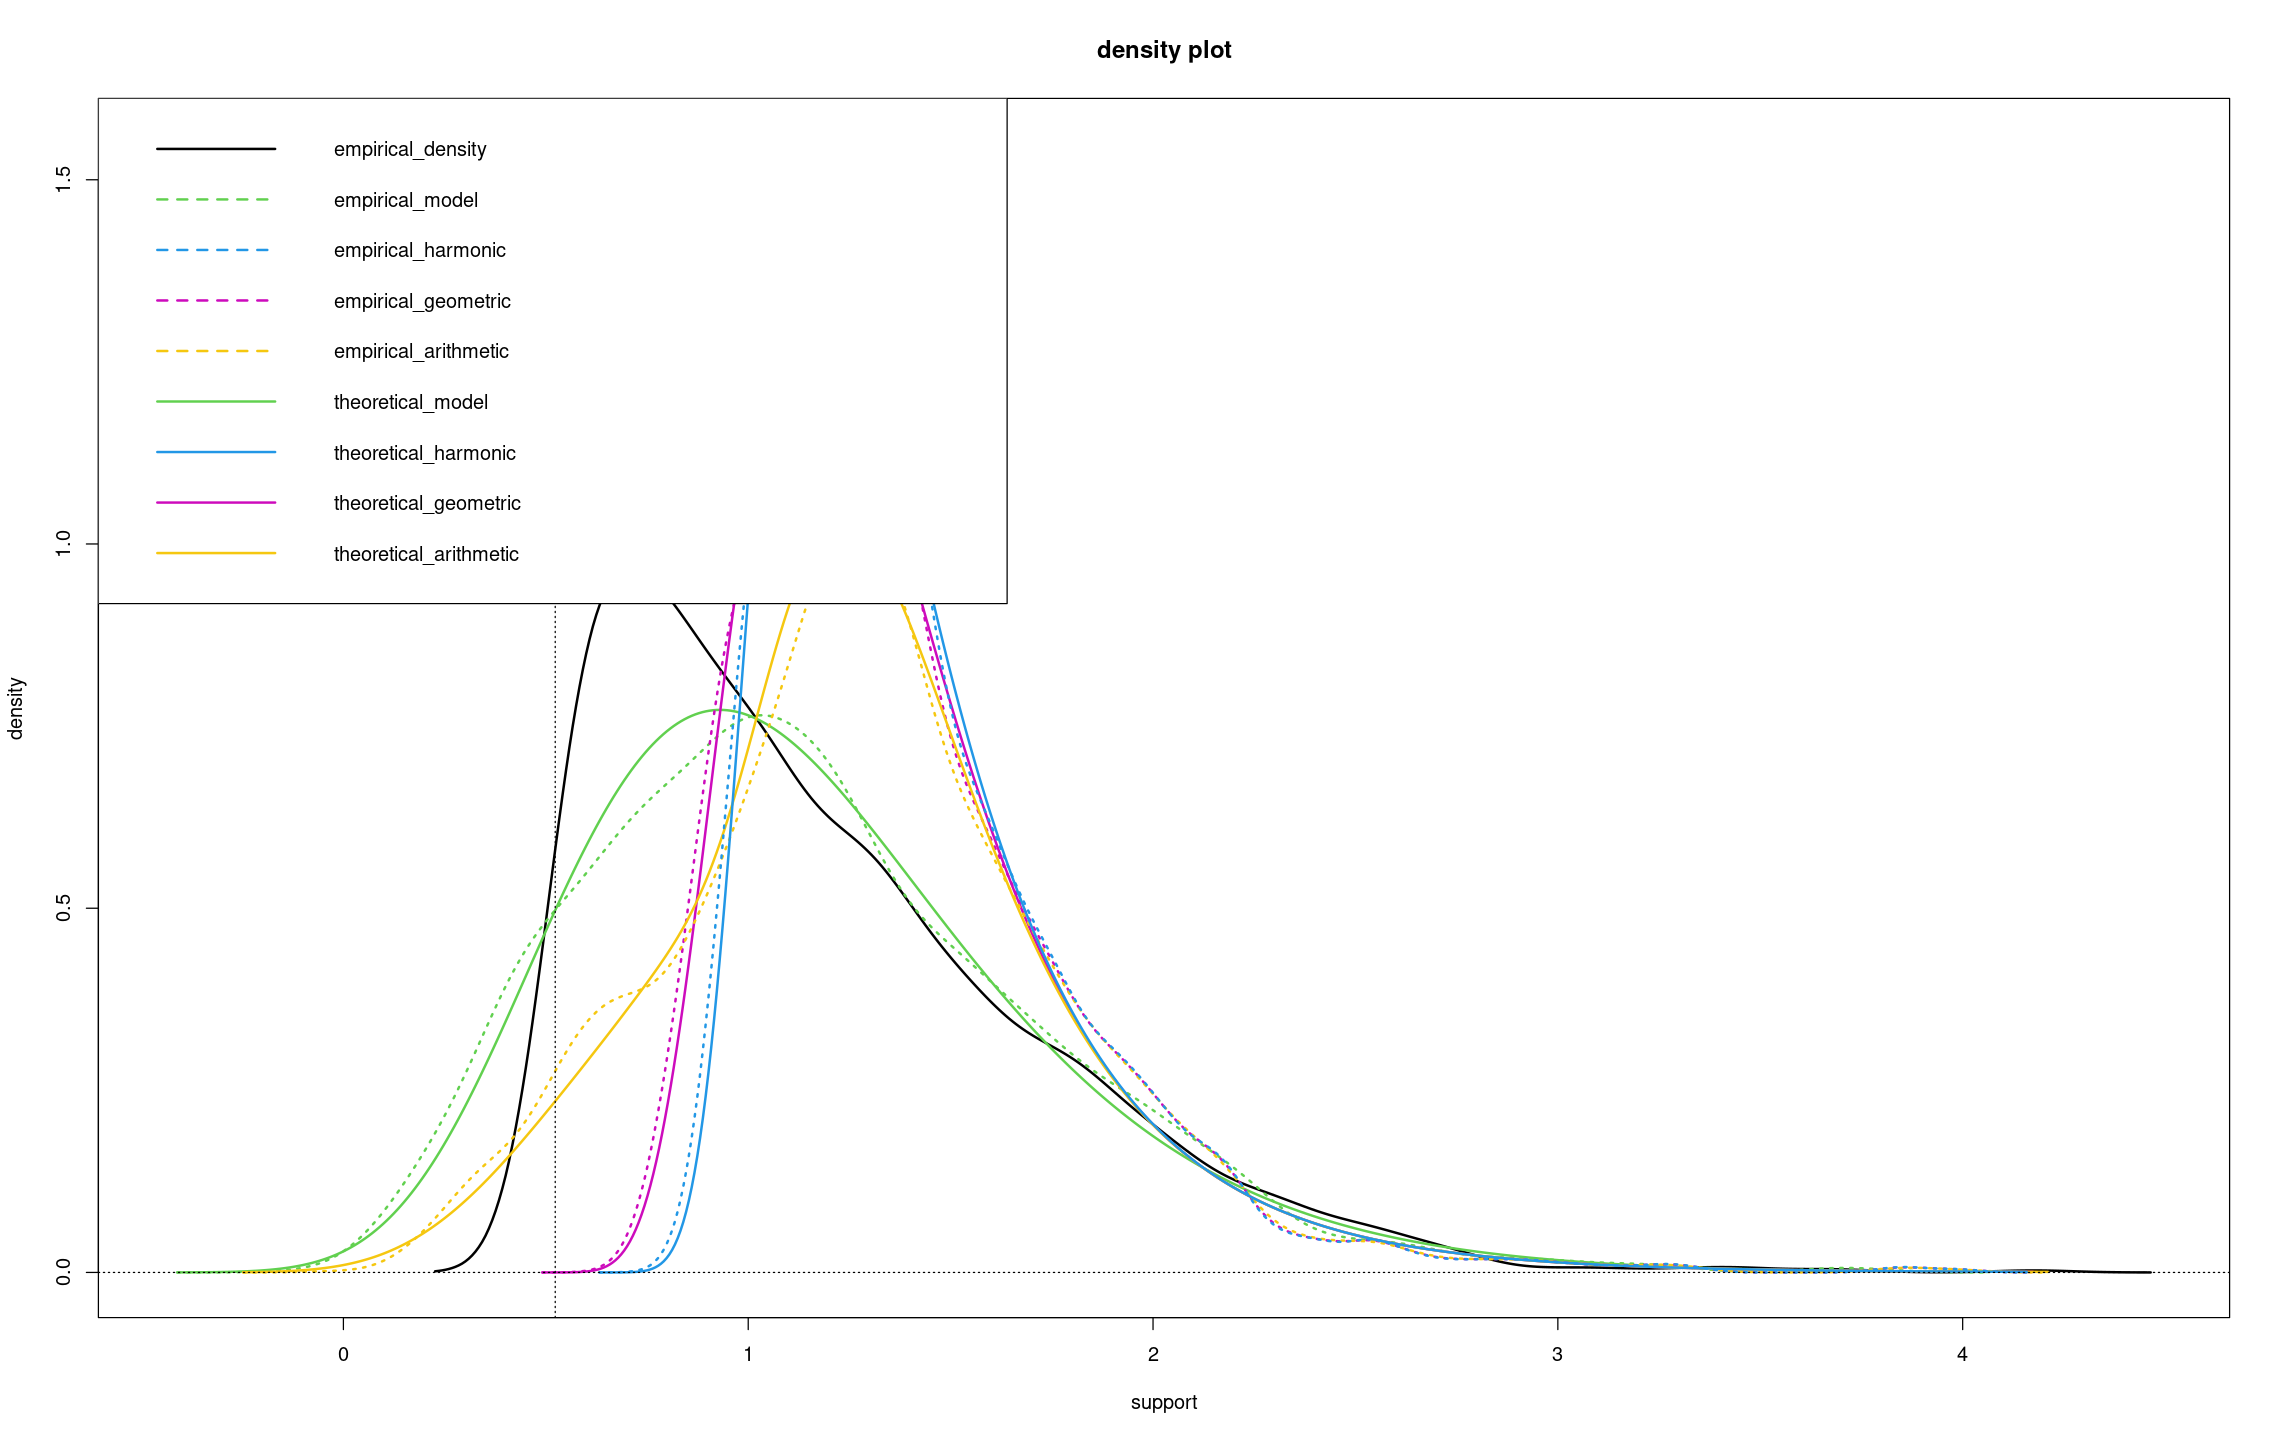

In [17]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

# Quantiles

In [18]:
alpha <- n^(-2)

print(alpha)

[1] 1e-08


In [19]:
true_quantile <- qnorm(p = 1 - alpha)

print(true_quantile)

[1] 5.612001243


In [20]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
2,5.5111634587,7.660356088,9.809548717
4,4.4115814291,5.968032889,7.524484350
5,4.2949782991,6.056805644,7.818632989
30,-0.7037316018,8.285114708,17.273961017
38,-7.7372503244,11.130975785,29.999201895
40,-5.4709468723,9.814630154,25.100207180
43,-8.3687506797,11.191111637,30.750973955
45,-2.7284217965,7.819866683,18.368155162
47,-7.3316775255,10.164265308,27.660208141


In [21]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
2,5.5111634587,7.660356088,9.809548717
4,4.4115814291,5.968032889,7.524484350
5,4.2949782991,6.056805644,7.818632989
30,-0.7037316018,8.285114708,17.273961017
38,-7.7372503244,11.130975785,29.999201895
40,-5.4709468723,9.814630154,25.100207180
43,-8.3687506797,11.191111637,30.750973955
45,-2.7284217965,7.819866683,18.368155162
47,-7.3316775255,10.164265308,27.660208141


In [22]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
2,5.5111634587,7.660356088,9.809548717
4,4.4115814291,5.968032889,7.524484350
5,4.2949782991,6.056805644,7.818632989
30,-0.7037316018,8.285114708,17.273961017
38,-7.7372503244,11.130975785,29.999201895
40,-5.4709468723,9.814630154,25.100207180
43,-8.3687506797,11.191111637,30.750973955
45,-2.7284217965,7.819866683,18.368155162
47,-7.3316775255,10.164265308,27.660208141


In [23]:
options(repr.plot.width=23, repr.plot.height=6)

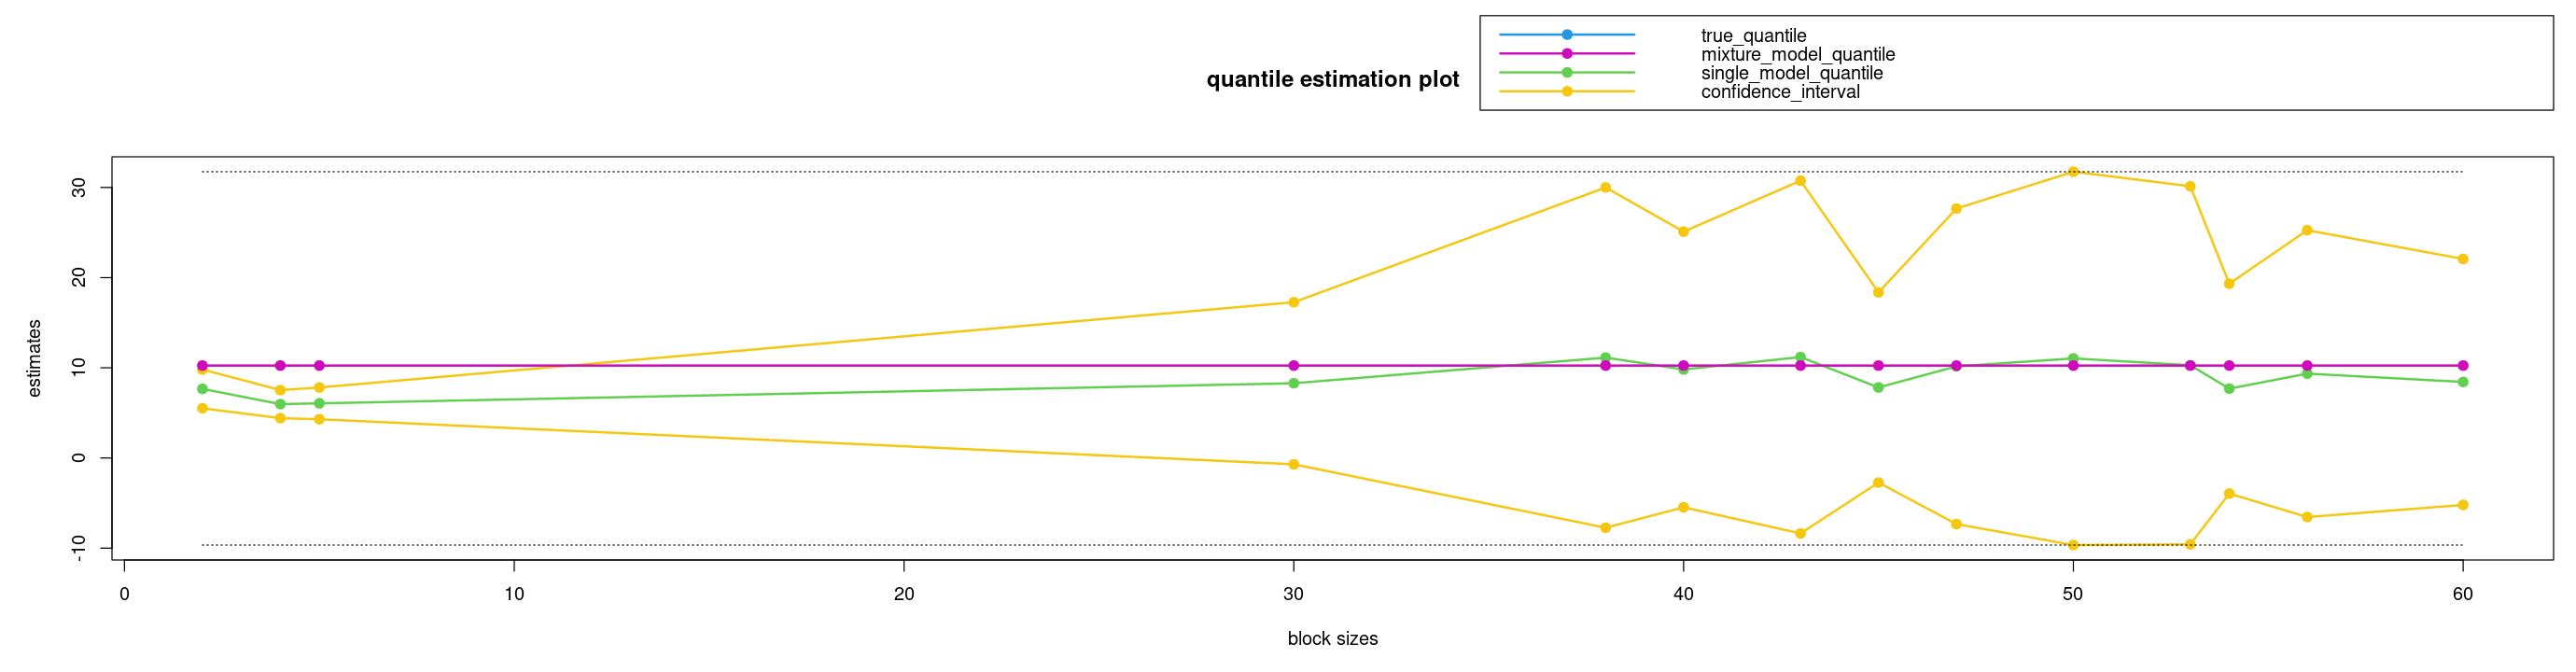

In [24]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

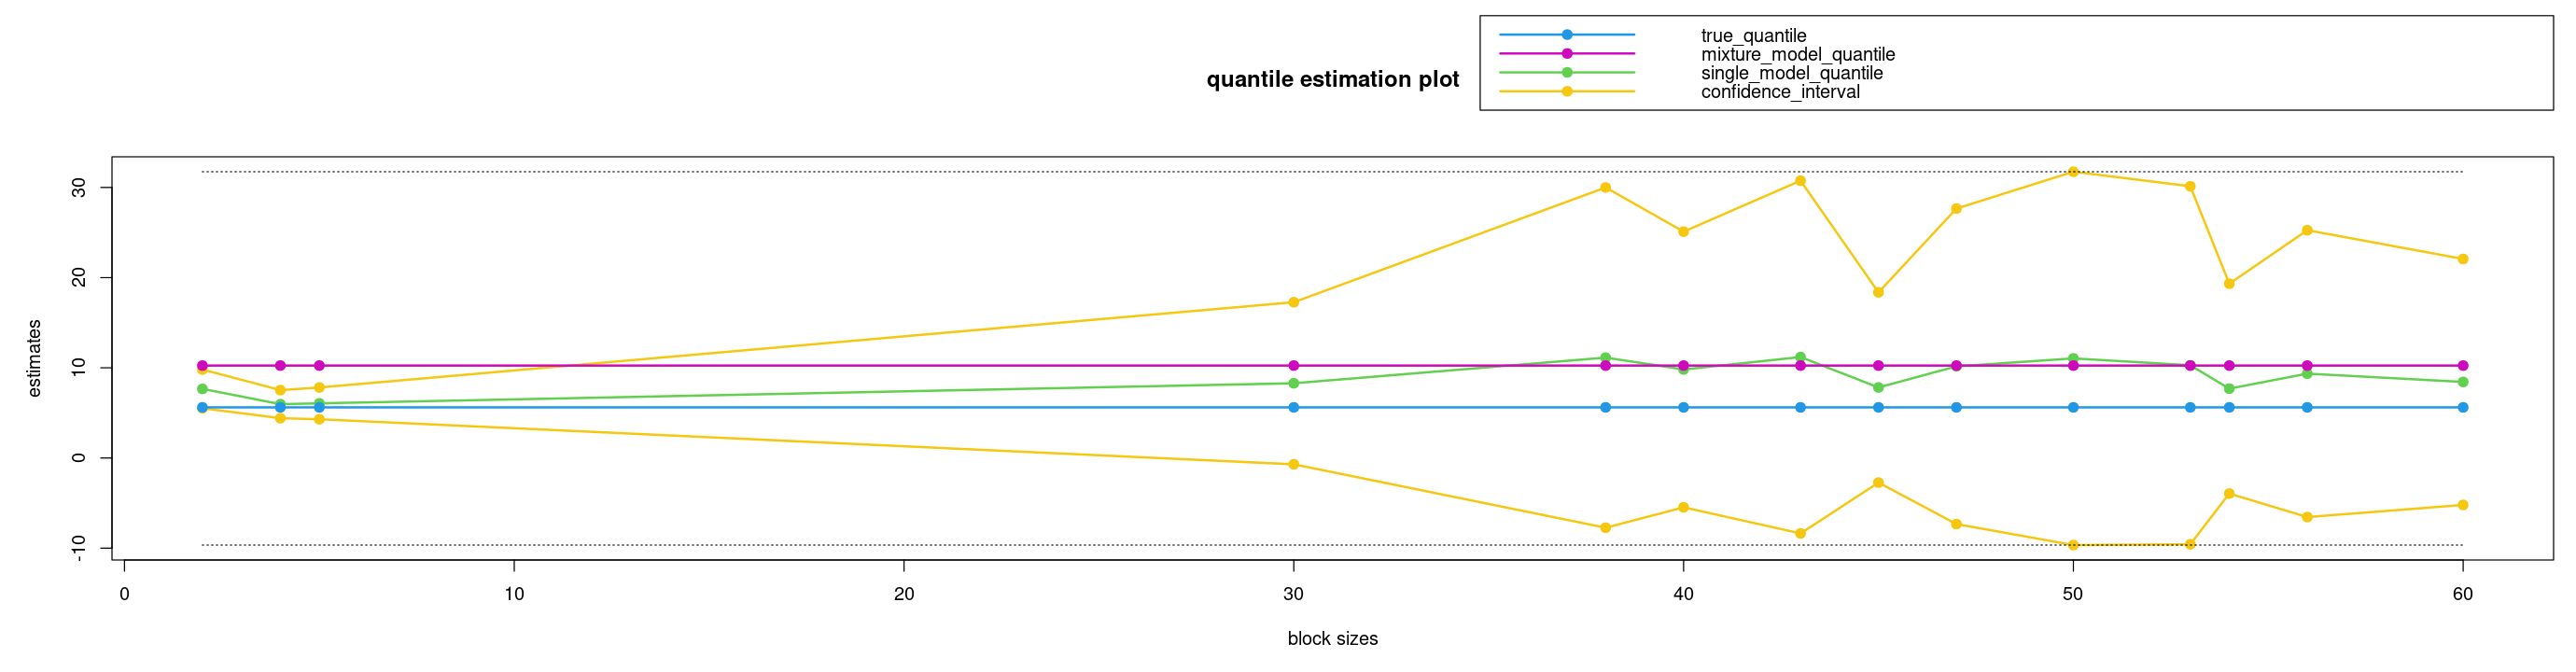

In [25]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = true_quantile,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")
